In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('day.csv')

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.shape

(730, 16)

In [7]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
#Checking missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
#Rename the columns:
df.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
df.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
###Mapping variables season, month, weathersit, weekday

df['season']=df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df['month']=df.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

df.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
#Data Visualisation

# I can check the number of unique values is a column
# If the number of unique values <=40: Categorical column
# If the number of unique values in a columns> 50: Continuous

df.nunique().sort_values()

Year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
dteday        730
dtype: int64

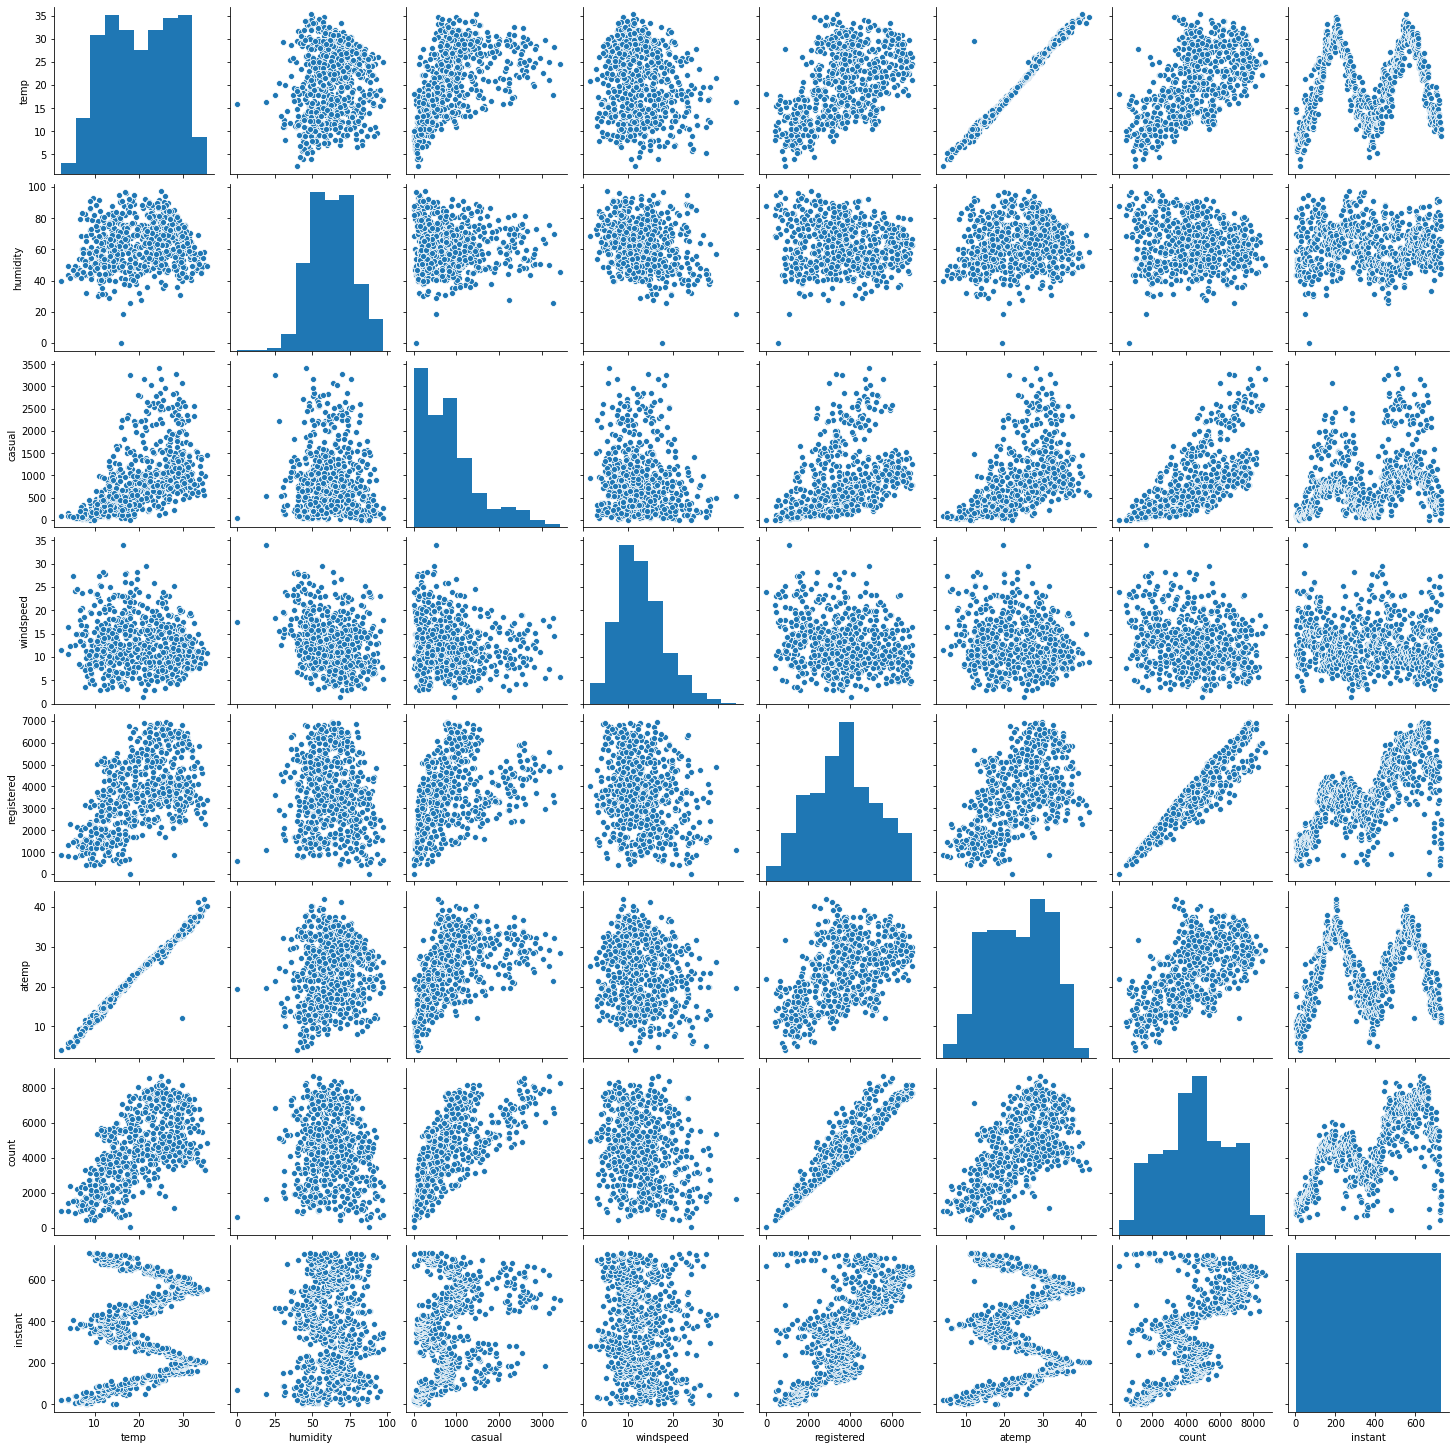

In [14]:
#Making Pairplots (Numeric Variables)

sns.pairplot(df, vars=["temp", "humidity",'casual','windspeed','registered','atemp','count','instant'])
plt.show()

In [19]:
##These pair plot results shows all numerical variables are positively correlated 

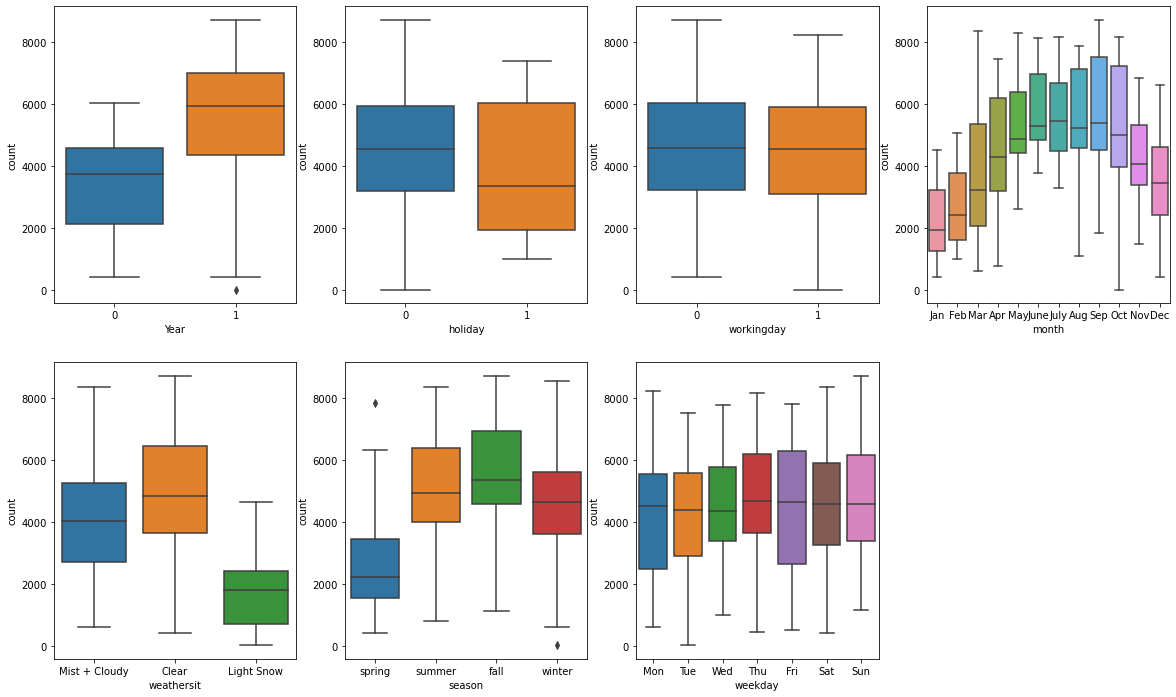

In [20]:
#visualising Categorical variables

##Relationship between categorical and continuous variable
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = df)
plt.show()

In [23]:
###The plots above shows the relationship between categorical variables and a Target variable.

#Bike Rentals are more during the Fall season and then in summer
#Bike Rentals are more in the year 2019 compared to 2018
#Bike Rentals are more in partly cloudy weather
#Bike Rentals are more on Saturday,wednesday and thursday


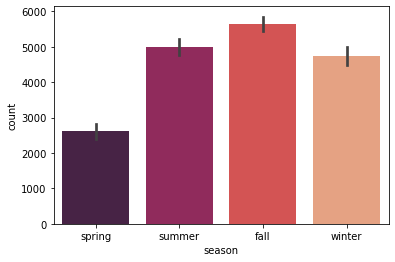

In [25]:
#Bar plots between two variables 

#1. SEASON

#Barplot to see relation between season and count of bike rentals
sns.barplot('season','count',data=df,palette="rocket",)
plt.show()

In [ ]:
#Bike Rentals are more during the Fall season and then in summer

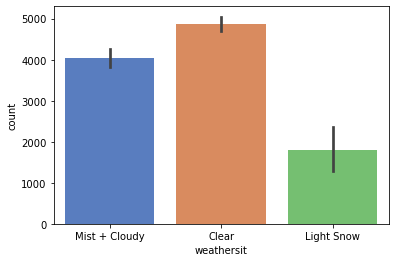

In [26]:
#2.Weathersit

#Relation between weather and count of bike rentals
sns.barplot('weathersit','count',palette="muted",data=df)
plt.show()

In [ ]:
#Bike Rentals are more in partly cloudy weather

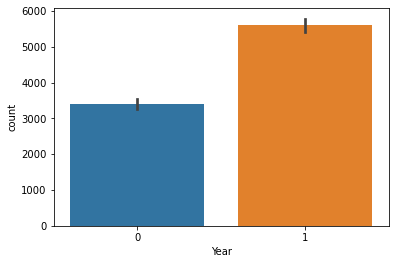

In [27]:
#3.Year

#Relation between Year and count of bike rentals
sns.barplot('Year','count',data=df)
plt.show()

In [ ]:
#Bike rentals are more in the year 2019 compared to 2018

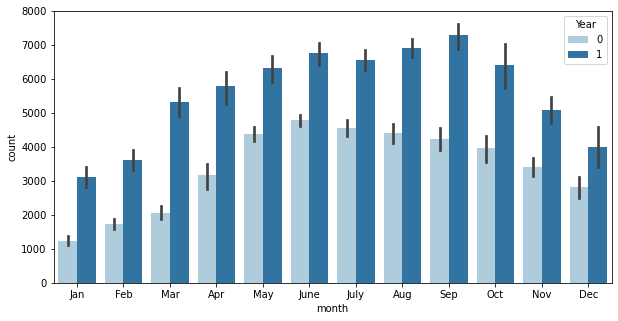

In [29]:
#4.Month

#Relation between month and 
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='Year',data=df,palette='Paired')
plt.show()

In [ ]:
#Bike Rentals are more in the year 2019 compared to 2018

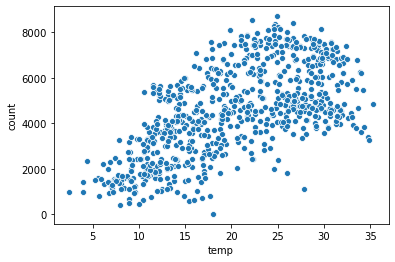

In [30]:
#5.Temperature

#scatter plot for temperature to count
sns.scatterplot(x='temp',y='count' ,data=df)
plt.show()

In [ ]:
#Bike Rentals are observed at higher temperatures

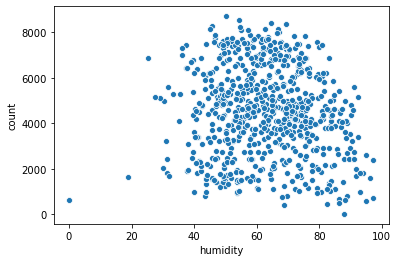

In [32]:
#6.Humidity

sns.scatterplot(x='humidity', y='count',data=df)
plt.show()

In [ ]:
#Bike rentals more at high humidity

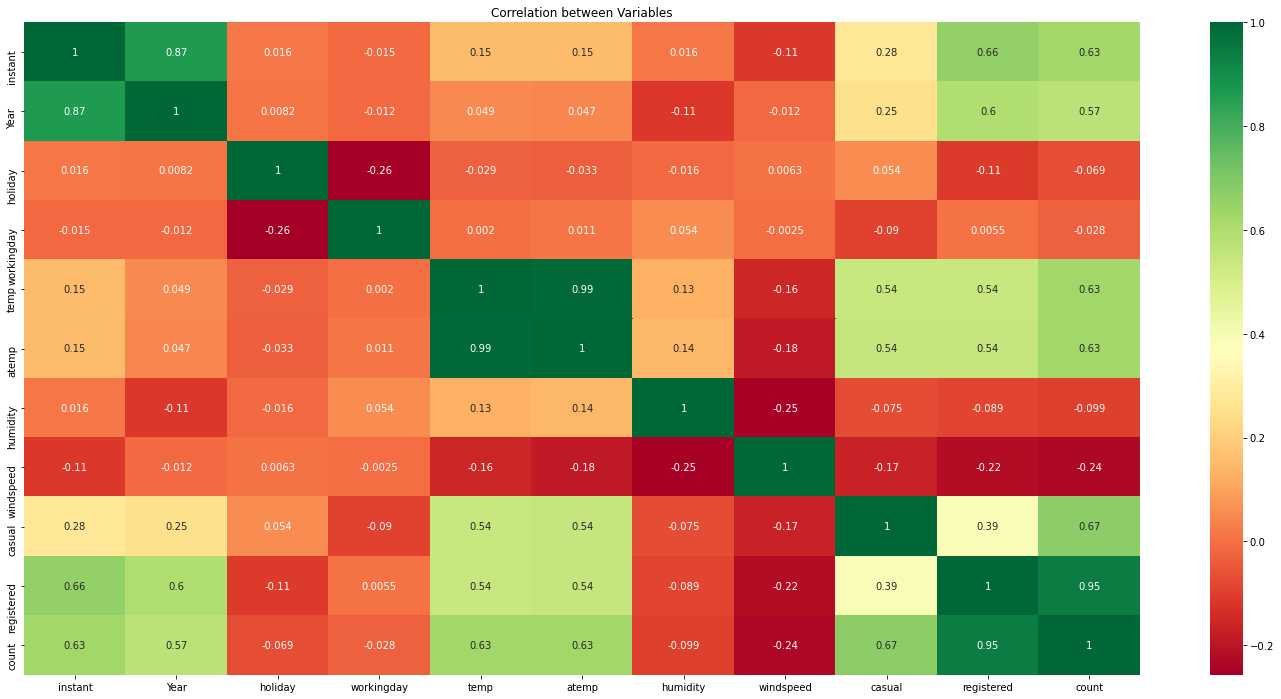

In [33]:
#Heatmap

#Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(df.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

In [ ]:
#As is visible from the pairplot and the heatmap, we can see temp, atemp, casual,registered,instant variables are correlated to 'count' variable

#We can also see some other variables are also most correlated.
#Both the plots above helps to interpret the data well and identify the variables that can turn out to be useful in building the model
#So yes we can consider a Linear Regression Model.


In [34]:
#Drop the unnecessary variables from the dataset
#We can see the dataset has some variables that are not required. We can drop instant, dteday, casual, registered

#drop unnecessary columns
df=df.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
df.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [35]:
#Check the datatypes

#Checking datatypes of all the columns
df.dtypes

season         object
Year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
humidity      float64
windspeed     float64
count           int64
dtype: object

In [37]:
#Step 3: Data Preparation
#Dummy variables

# # Get the dummy variables for month, season, weathersit, weekday and Let's drop the first column from  using 'drop_first = True'pd.get_dummies(bike.season,drop_first=True)
months=pd.get_dummies(df.month,drop_first=True)
weekdays=pd.get_dummies(df.weekday,drop_first=True)
weather_sit=pd.get_dummies(df.weathersit,drop_first=True)
seasons=pd.get_dummies(df.season,drop_first=True)


# Add the results to the original bike dataframe
df=pd.concat([months,weekdays,weather_sit,seasons,df],axis=1)
df.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [38]:
# Drop 'season','month','weekday','weathersit' as we have created the dummies for it
df.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
df.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [39]:
#Number of rows and columns
df.shape

(730, 29)

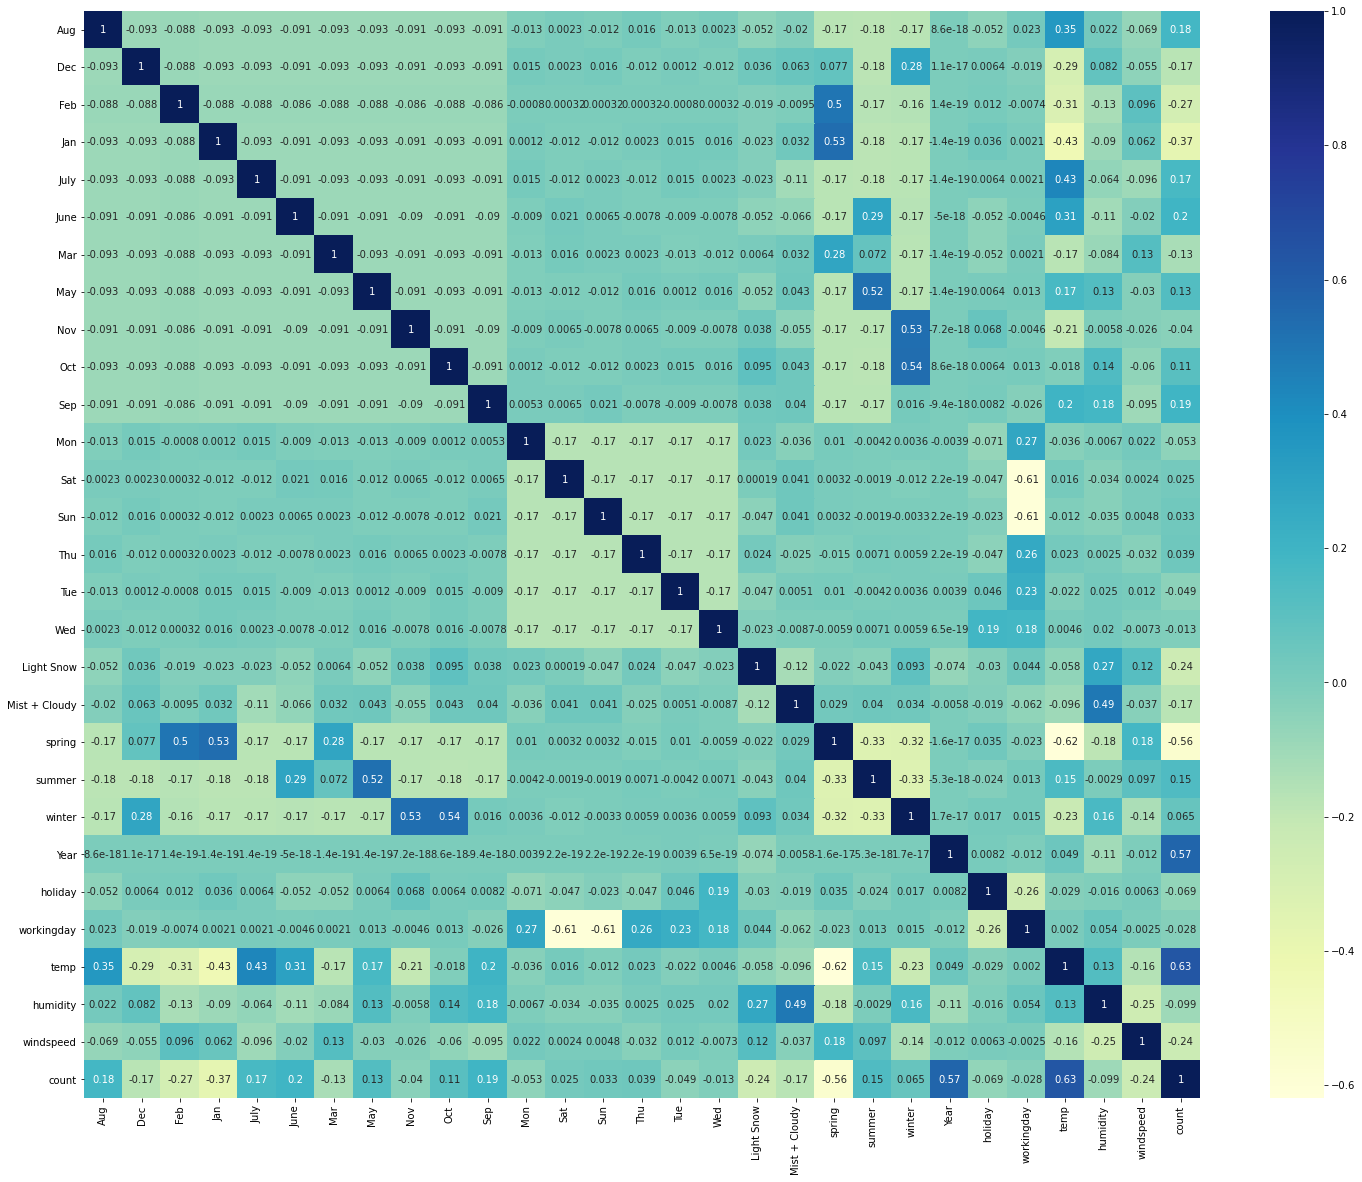

In [40]:
#Now lets check the correlation between variables again
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)
plt.show()

In [20]:
#We can see that temperature,Summer season,June to october months are in good correlation with the 'count' variable. And seem to have good influence on the number of bike rentals.

In [43]:
#Step 4: Splitting the Data into Training and Testing Sets
#Before model building, you first need to perform the test-train split and scale the features.

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
#np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [44]:
#Rows and columns after split
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [23]:
#Rescaling the Features
#It is important to have all the variables on the same scale for the model to be easily interpretable. We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

#There are two common ways of rescaling:

#Min-Max scaling (Normalisation):Between 0 and 1

#Standardisation :mean-0, sigma-1

In [ ]:
#Min-Max scaling

In [45]:
#Normalisation = (x-xmin)/(x max-x min)
#Standardisation= (x-mu)/ sigma
#import the library
from sklearn.preprocessing import MinMaxScaler

In [46]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.345824,0.751824,0.380981,0.191095


In [47]:
#Checking numeric variables(min and max) after scaling
df_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#All the numeric variables are now mapped between 0 and 1

#Multicollinearity: Assumes that predictors are not correlated with each other. If there is correlation among the predictors

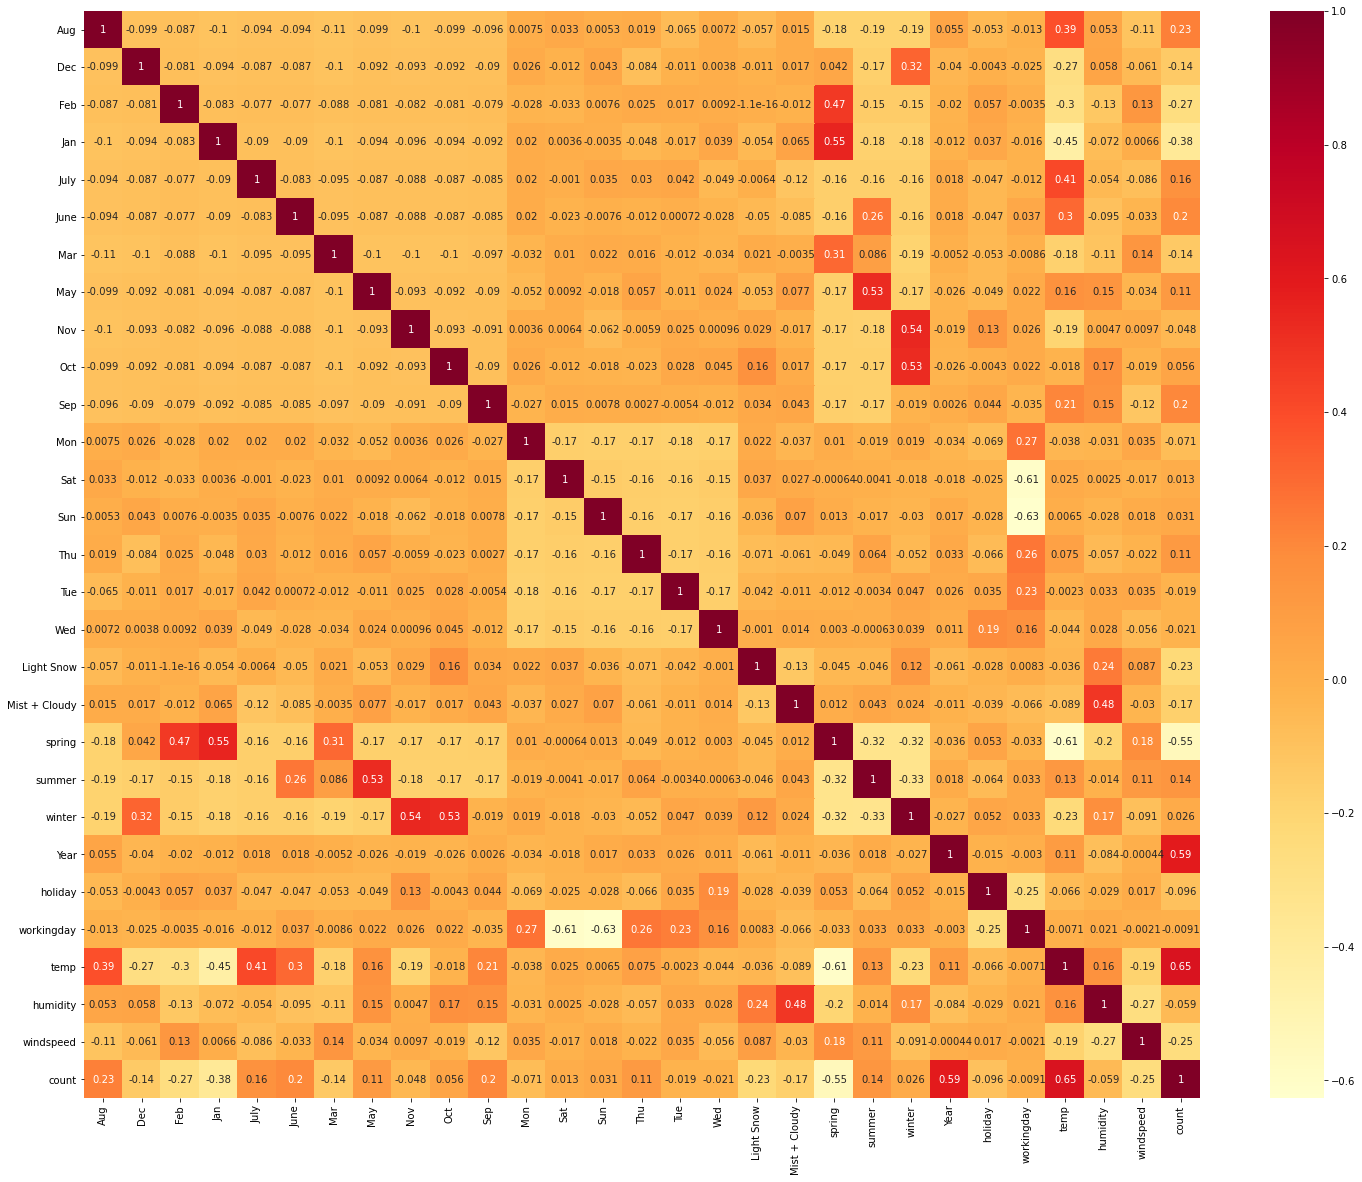

In [48]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
#Little to no multicollinearity among predictors

plt.figure(figsize=(25, 20))
sns.heatmap(df_train.corr(),cmap='YlOrRd',annot = True)
plt.show()

In [ ]:
#From the heatmap we can see temp, year are correlated to the 'count' variable. Even in August, September months we can see the counts are little high.

In [ ]:
###Dividing into X and Y sets for the model building

In [49]:
#Divide the data into X and y
y_train = df_train.pop('count')
X_train = df_train

In [50]:
#Step 5: Building a linear model


#We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

#RFE

#Recursive Feature Elimination

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [51]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [52]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [53]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter', 'Year', 'holiday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [54]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'workingday'],
      dtype='object')

In [55]:
#Building model using statsmodel, for the detailed statistics

In [56]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [57]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [58]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [59]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sat, 12 Dec 2020   Prob (F-statistic):          8.15e-189
Time:                        04:44:32   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859

In [ ]:
#Checking VIF
#Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:


In [60]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [61]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,humidity,30.89
12,temp,17.79
14,windspeed,4.72
7,spring,4.37
9,winter,4.06
8,summer,2.82
6,Mist + Cloudy,2.32
10,Year,2.09
3,Nov,1.85
1,Jan,1.75


In [ ]:
#January is insignificant in presence of other variables due to high p-value and low VIF; can be dropped

In [62]:
#Drop January
X_train_new1 = X_train_rfe.drop(["Jan"], axis = 1)

In [63]:
#Rebuilding the model without 'Jan'

In [64]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.0
Date:                Sat, 12 Dec 2020   Prob (F-statistic):          9.86e-189
Time:                        04:46:19   Log-Likelihood:                 511.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     495   BIC:                            -929.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3002      0.035      8.499

In [70]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,29.30
11,temp,16.75
13,windspeed,4.72
8,winter,4.06
6,spring,4.04
7,summer,2.81
5,Mist + Cloudy,2.31
9,Year,2.08
2,Nov,1.83
1,July,1.59


In [ ]:
#'humidity' variable can be dropped as its insignificant by looking at very high VIF

In [ ]:
#Rebuilding the model without 'humidity'

In [74]:
#Drop humidity
X_train_new2 = X_train_lm1.drop(["humidity"], axis = 1)

In [75]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.6
Date:                Sat, 12 Dec 2020   Prob (F-statistic):          1.29e-185
Time:                        04:51:43   Log-Likelihood:                 501.07
No. Observations:                 510   AIC:                            -974.1
Df Residuals:                     496   BIC:                            -914.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2183      0.031      7.082

In [78]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,5.12
12,windspeed,4.65
8,winter,2.91
7,summer,2.23
6,spring,2.13
9,Year,2.07
2,Nov,1.81
1,July,1.59
5,Mist + Cloudy,1.55
0,Dec,1.42


In [ ]:
#Holiday variable seems to be insignificant, by looking at p value and low VIF. We can drop it

In [ ]:
#Rebuliding the model without holiday

In [79]:
#Drop the holiday column
X_train_new3=X_train_lm2.drop(['holiday'],axis=1)

In [80]:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.0
Date:                Sat, 12 Dec 2020   Prob (F-statistic):          4.39e-184
Time:                        04:54:04   Log-Likelihood:                 494.65
No. Observations:                 510   AIC:                            -963.3
Df Residuals:                     497   BIC:                            -908.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2186      0.031      7.010

In [81]:
#Drop constant 
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [82]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.12
11,windspeed,4.65
8,winter,2.91
7,summer,2.23
6,spring,2.12
9,Year,2.07
2,Nov,1.78
1,July,1.58
5,Mist + Cloudy,1.55
0,Dec,1.42


In [ ]:
#Windspeed seems to be insignificant,by looking at high VIF and negative correlation with count. Lets drop it

In [ ]:
#Rebuilding the model without windspeed

In [83]:
#Drop July
X_train_new4= X_train_lm3.drop(['windspeed'], axis=1)

In [84]:
#Build a model
X_train_lm4=sm.add_constant(X_train_new4)
lm4=sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     207.6
Date:                Sat, 12 Dec 2020   Prob (F-statistic):          5.03e-178
Time:                        04:55:23   Log-Likelihood:                 477.50
No. Observations:                 510   AIC:                            -931.0
Df Residuals:                     498   BIC:                            -880.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1681      0.031      5.428

In [85]:
#Drop constant
X_train_lm4= X_train_lm4.drop(['const'], axis=1)

In [86]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X =X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,4.22
8,winter,2.77
9,Year,2.06
7,summer,1.94
2,Nov,1.76
1,July,1.58
5,Mist + Cloudy,1.55
6,spring,1.43
0,Dec,1.42
3,Sep,1.34


In [ ]:
#July column can be dropped due to its p value and low VIF

In [ ]:
#Rebuilding the model without July

In [87]:
#Drop July
X_train_new5=X_train_lm4.drop(['July'], axis=1)

In [88]:
#Building a model
X_train_lm5= sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     224.9
Date:                Sat, 12 Dec 2020   Prob (F-statistic):          1.07e-177
Time:                        04:56:36   Log-Likelihood:                 473.92
No. Observations:                 510   AIC:                            -925.8
Df Residuals:                     499   BIC:                            -879.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1594      0.031      5.145

In [89]:
#Drop the constant
X_train_lm7=X_train_lm5.drop(['const'],axis=1)

In [90]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,2.89
7,winter,2.61
8,Year,2.06
1,Nov,1.76
6,summer,1.63
4,Mist + Cloudy,1.55
0,Dec,1.42
5,spring,1.36
2,Sep,1.24
3,Light Snow,1.07


In [ ]:
#Now we can see we have our model.
#The p values represent the significance of the variables and VIF which represent how variables are correlated to each other. Based on these two parameters we decided which variable to drop.
#The VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

In [ ]:
#- The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

#- A rule of thumb commonly used in practice is if a VIF is > 10, you have high multicollinearity. In our case, with values less than 5, we are in good shape, and can proceed with our regression

#- R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. And we have the R-square value of 0.826 or 82.6%

#- The adjusted R-squared adjusts for the number of terms in the model. And we got it around 0.81 or 81%

In [91]:
#Drop temp for the lm4 model 
X_train_new6=X_train_lm4.drop(['temp'], axis=1)

In [92]:
#Building a model
X_train_lm6= sm.add_constant(X_train_new6)
lm6=sm.OLS(y_train,X_train_lm6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     155.7
Date:                Sat, 12 Dec 2020   Prob (F-statistic):          2.16e-146
Time:                        04:59:01   Log-Likelihood:                 399.93
No. Observations:                 510   AIC:                            -777.9
Df Residuals:                     499   BIC:                            -731.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5431      0.015     36.354

In [ ]:
#Here we can see there is a huge drop on R-square and adjusted R-squared. So this wont be a good model.

#So our model is lm5 which is obtained by removing January, windspeed, holiday, July and humidity variables from the RFE support columns

In [ ]:
#Residual Analysis of the train data


So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression),



let us plot the histogram of the error terms and see what it looks like.

In [93]:
#X_train_lm5=sm.add_constant(X_train_lm5)
#X_train_lm5.columns
X_train_lm5

,const,Dec,Nov,Sep,Light Snow,Mist + Cloudy,spring,summer,winter,Year,temp
576,1.0,0,0,0,0,0,0,0,0,1,0.815169
426,1.0,0,0,0,0,1,1,0,0,1,0.442393
728,1.0,1,0,0,0,0,1,0,0,1,0.245101
482,1.0,0,0,0,0,1,0,1,0,1,0.395666
111,1.0,0,0,0,0,1,0,1,0,0,0.345824
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,0,0,1,0.863973
53,1.0,0,0,0,0,0,1,0,0,0,0.202618
350,1.0,1,0,0,0,1,0,0,1,0,0.248216
79,1.0,0,0,0,0,1,0,1,0,0,0.462664


In [94]:
#y train predicted
y_train_pred = lm5.predict(X_train_lm5)

<Figure size 432x288 with 0 Axes>

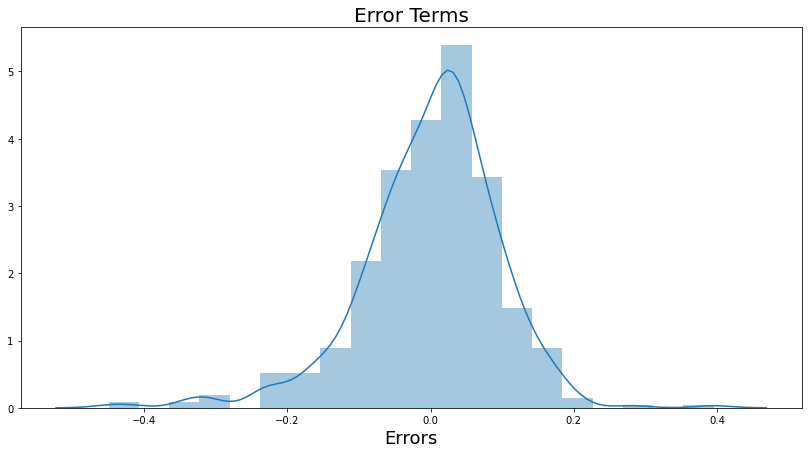

In [95]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

In [ ]:
#We can see Error terms are normally distributed

In [ ]:
#Making Predictions


#Applying the scaling on the test sets

In [96]:
#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0.817246,0.314298,0.537414,0.569029


In [ ]:
#Dividing into X_test and y_test

In [97]:
#Dividing into X_test and y_test
y_test = df_test.pop('count')
X_test = df_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [98]:
#Columns
X_train_new5.columns

Index(['Dec', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter', 'Year', 'temp'],
      dtype='object')

In [99]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Dec,Nov,Sep,Light Snow,Mist + Cloudy,spring,summer,winter,Year,temp
184,1.0,0,0,0,0,1,0,0,0,0,0.831783
535,1.0,0,0,0,0,0,0,1,0,1,0.901354
299,1.0,0,0,0,0,1,0,0,1,0,0.511964
221,1.0,0,0,0,0,0,0,0,0,0,0.881625
152,1.0,0,0,0,0,0,0,1,0,0,0.817246


In [100]:
# Making predictions
y_pred = lm5.predict(X_test_new1)

In [101]:
#Finding R-squared and Adjusted R-Squared for Test set


In [102]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8158795007526897

In [106]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.8158795)*(11-1)/(11-1-1)
print(Adj_r2)

0.7954216666666667


In [ ]:
#Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

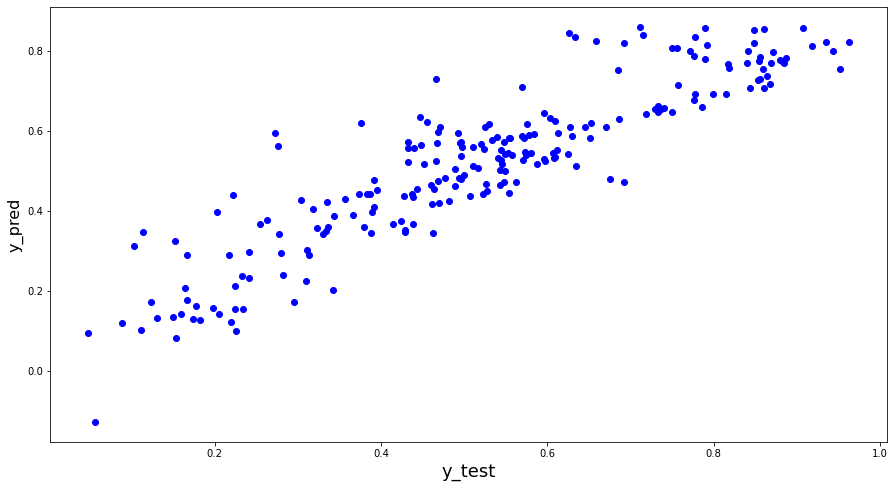

In [107]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [ ]:
#Visualising the fit on the test set

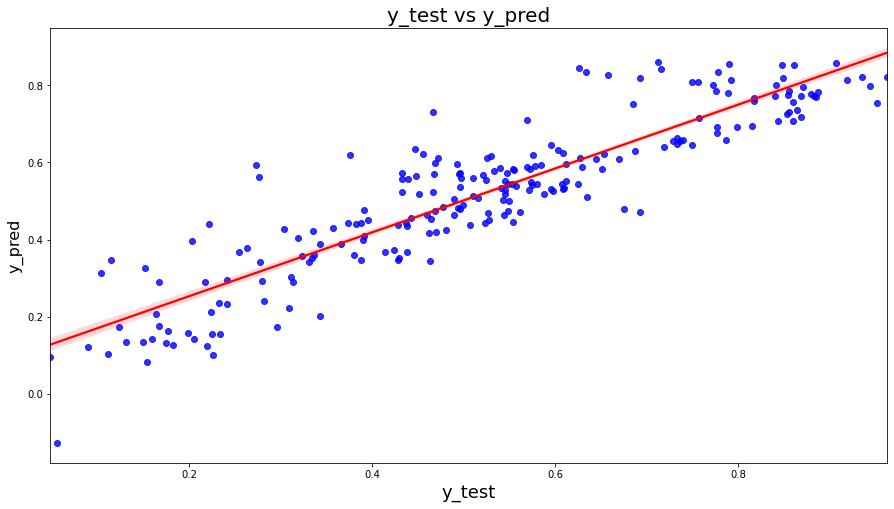

In [108]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [ ]:
#We can see that the equation of our best fitted line is:

#count=0.4914×temp+0.0916×September+0.0645×Saturday+0.0527×summer+0.0970×winter+0.2334×Year+0.0566×workingday−0.03041×lightsnow−0.0786×mistcloudy−0.065×spring

In [ ]:
#Final Result Comparison between Train model and Test:
#- Train R^2 : 0.818
#- Train Adjusted R^2 : 0.82
#- Test R^2: 0.8158
#- Test Adjusted R^2: 0.7954
#- Difference in R^2 between train and test: 1.5%
#- Difference in adjusted R^2 between Train and test: 3.15% which is less than 5%



#Yes! Its a best model